In [1]:
from sklearn.cluster import KMeans #clustering
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,From_Nametag,To,To_Nametag,Amount,Value (USD)
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb4827a3cf6656f49c349,Success,Transfer,22672601,2025-06-10 07:14:23,0x26261D5fC06de4d39F253D05a58E62B48750Aa6D,NaN,0x8c018fE62835615565D5fbe28e6bAc6960888F4D,NaN,"54,602.719796","$54,592.02",NaN
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6af5f7641c3e8928e0c8,Success,Deposit,22672601,2025-06-10 07:14:23,0xe52520062163c37Bd1920808F66cF0009e8Ff3bd,NaN,0xd5255Cc08EBAf6D54ac9448822a18d8A3da29A42,NaN,998.826362,$998.63,NaN
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2e993ee19f7bbdfc9863,Success,0x2213bc0b,22672601,2025-06-10 07:14:23,0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61,NaN,0x0dBecaD6cDC77079Bb8A9758555065240164a008,NaN,3.513046,$3.51,NaN
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2e993ee19f7bbdfc9863,Success,0x2213bc0b,22672601,2025-06-10 07:14:23,0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61,NaN,0x7AfA9D836d2fCCf172b66622625e56404E465dBD,NaN,0.030116,$0.03,NaN
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2e993ee19f7bbdfc9863,Success,0x2213bc0b,22672601,2025-06-10 07:14:23,0xBB289bC97591F70D8216462DF40ED713011B968a,NaN,0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61,NaN,3.543162,$3.54,NaN


In [4]:
df.shape

(25, 11)

In [7]:
import sys
print("Python executable:", sys.executable)
import flwr as fl
from flwr.common import NDArrays, Scalar
from typing import Dict, Tuple, Optional  
import matplotlib.pyplot as plt



Python executable: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-19 20:48:10,474	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [9]:
import ray
from sklearn.metrics import silhouette_score

# Ensure any previous Ray instance is shut down
ray.shutdown()
ray.init(dashboard_port=None, include_dashboard=False)

print("Flower is installed successfully!")
print("Tuple type:", tuple)  # Note: 'Tuple' was undefined; I assume you meant the built-in 'tuple'

OSError: [Errno 0] AssignProcessToJobObject() failed

In [ ]:
#Preprocessing the data again for percentage and value
# Preprocessing the data again for percentage and value
df = pd.read_csv('data.csv')

# Handle 'Percentage' column (if it doesn't exist, set a default value)
if 'Percentage' in df.columns:
    df['Percentage'] = df['Percentage'].str.rstrip('%').astype(float)
else:
    print("Warning: 'Percentage' column not found in CSV. Setting to 0.")
    df['Percentage'] = 0.0  # Default value; adjust as needed

# Handle 'Value' column
if 'Value' in df.columns:
    df['Value'] = df['Value'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
else:
    print("Warning: 'Value' column not found. Setting to 0.")
    df['Value'] = 0.0  # Default value; adjust as needed

# Use 'Amount' instead of 'Quantity'
if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
else:
    print("Warning: 'Amount' column not found. Setting to 0.")
    df['Amount'] = 0.0  # Default value; adjust as needed

# Display the updated DataFrame to verify
print(df.head())

                                                   Transaction Hash  \
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...          Success   
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   

                                                        Status    Method  \
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...    Transfer  22672601   
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...     Deposit  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   

                                                                BlockNo  \
0x4932f4925b771a3f98677b667a28d79f2dd2735

In [19]:
# Check for NaN values after conversion
if df['Amount'].isna().any():
    print("Warning: Some Amount values could not be converted to numeric. Replacing NaN with 0.")
    df['Amount'] = df['Amount'].fillna(0)

# Verify the data type
print("Amount column data type:", df['Amount'].dtype)
print(df[['Amount', 'Percentage', 'Value']].head())

Amount column data type: float64
                                                    Amount  Percentage  Value
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...     0.0         0.0    0.0
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0


In [20]:
#feature scaling percentage and value
# Reason: Quantity (absolute) and Percentage (relative) provide complementary information,
# leading to better clustering results compared to Quantity and Value (which are highly correlated)
feature_to_scale= df[['Amount','Value']]
scaler= MinMaxScaler()
scaler_data=scaler.fit_transform(feature_to_scale)
print("Feature variance:",feature_to_scale.var())

Feature variance: Amount    0.0
Value     0.0
dtype: float64


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Split into clients based on From_Nametag or To_Nametag
if 'From_Nametag' in df.columns:
    binance_mask = df['From_Nametag'].str.contains('Binance', na=False)
    print("From_Nametag mask sum:", binance_mask.sum())
    if not binance_mask.any():
        print("No Binance-related data found in 'From_Nametag'. Checking 'To_Nametag'.")
        if 'To_Nametag' in df.columns:
            binance_mask = df['To_Nametag'].str.contains('Binance', na=False)
            print("To_Nametag mask sum:", binance_mask.sum())
        else:
            print("Warning: Neither 'From_Nametag' nor 'To_Nametag' contains Binance data.")
            binance_mask = pd.Series([False] * len(df))
else:
    print("Warning: 'From_Nametag' column not found. Checking 'To_Nametag'.")
    if 'To_Nametag' in df.columns:
        binance_mask = df['To_Nametag'].str.contains('Binance', na=False)
        print("To_Nametag mask sum:", binance_mask.sum())
    else:
        print("Warning: Neither 'From_Nametag' nor 'To_Nametag' found. Using 'From' as fallback.")
        binance_mask = df['From'].str.contains('Binance', na=False)
        print("From mask sum:", binance_mask.sum())

# Clean data before scaling
df_clean = df[['Amount', 'Value (USD)']].copy()
df_clean['Amount'] = pd.to_numeric(df_clean['Amount'], errors='coerce')
df_clean['Value (USD)'] = df_clean['Value (USD)'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_clean['Value (USD)'] = pd.to_numeric(df_clean['Value (USD)'], errors='coerce')
df_clean = df_clean.dropna()  # Drop rows with NaN

# Scale the cleaned data
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df_clean)
client_1_data = pd.DataFrame(scaler_data[binance_mask[df_clean.index]], columns=['Amount', 'Value (USD)'])

print("Client 1 data shape:", client_1_data.shape)
if len(client_1_data) == 0:
    print("No Binance-related data found after all checks. Using all cleaned data instead.")
    client_1_data = pd.DataFrame(scaler_data, columns=['Amount', 'Value (USD)'])
    print("Using all data. New shape:", client_1_data.shape)

# Local DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(client_1_data)
labels = dbscan.labels_
print("Cluster labels:", labels)

# Verify the result
print(client_1_data.head())

From_Nametag mask sum: 0
No Binance-related data found in 'From_Nametag'. Checking 'To_Nametag'.
To_Nametag mask sum: 0


AttributeError: Can only use .str accessor with string values!

In [24]:
class KMeansClient(fl.client.NumPyClient):  #defiing the flower client
    def __init__(self, data):
        self.data = data
        self.kmeans = KMeans(n_clusters=2, random_state=42)
        print(f"Client initialized with {len(self.data)} data points")

    def get_parameters(self, config: Dict[str, Scalar]) -> NDArrays:
        print("Client get_parameters called")
        if hasattr(self.kmeans, 'cluster_centers_'):
            return self.kmeans.cluster_centers_
        self.kmeans.fit(self.data)
        return self.kmeans.cluster_centers_

    def fit(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[NDArrays, int, Dict]:
        print("Client fit called")
        if parameters is not None:
            self.kmeans = KMeans(n_clusters=2, init=np.array(parameters), n_init=1, random_state=42)
        self.kmeans.fit(self.data)
        centers = self.kmeans.cluster_centers_
        print(f"Returning centers with shape: {centers.shape}")
        return centers, len(self.data), {}

    def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[float, int, Dict]:
        print("Client evaluate called")
        self.kmeans.cluster_centers_ = np.array(parameters)
        labels = self.kmeans.predict(self.data)
        return float(self.kmeans.inertia_), len(self.data), {}

In [25]:
# Define a custom strategy to aggregate cluster centers
class KMeansStrategy(fl.server.strategy.FedAvg):
    def __init__(self):
        super().__init__()
        self.global_centers = None
        print("Strategy initialized")

    def aggregate_fit(
        self,
        server_round: int,
        results: list[Tuple[fl.server.client_proxy.ClientProxy, fl.common.FitRes]],
        failures: list[Tuple[fl.server.client_proxy.ClientProxy, fl.common.FitRes]],
    ) -> Tuple[Optional[NDArrays], Dict[str, Scalar]]:
        print(f"Server round {server_round}: aggregate_fit called")
        print(f"Results: {len(results)}, Failures: {len(failures)}")
        if failures:
            print("Failures occurred:", failures)
            return None, {}
        aggregated_parameters, metrics = super().aggregate_fit(server_round, results, failures)
        if aggregated_parameters is not None:
            self.global_centers = np.array(aggregated_parameters)
            print(f"Global centers updated: {self.global_centers}")
        else:
            print("Aggregation failed, no parameters returned")
        return aggregated_parameters, metrics

strategy = KMeansStrategy()

Strategy initialized


In [26]:
#Run Flower simulation
def client_fn(cid: str):
    if cid == "0":
        return KMeansClient(client_1_data)
    elif cid == "1":
        return KMeansClient(client_2_data)
    else:
        return KMeansClient(client_3_data)
    


In [27]:
print("Starting Flower simulation...")

try:
    fl.simulation.start_simulation(
        client_fn=client_fn,
        num_clients=3,
        client_resources={"num_cpus": 1},
        config=fl.server.ServerConfig(num_rounds=3),
        strategy=strategy,
    )
    print("Simulation completed successfully")
except Exception as e:
    print(f"Simulation failed with error: {e}")

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=3, no round_timeout


Starting Flower simulation...
Simulation failed with error: [Errno 0] AssignProcessToJobObject() failed


In [29]:
from flwr.server import Server
from flwr.simulation import start_simulation
from flwr.server.strategy import FedAvg

# Dummy client function (replace with your actual client)
def client_fn(cid):
    return None  # Placeholder; implement your client logic

# Strategy
strategy = FedAvg()

# Start simulation
start_simulation(
    client_fn=client_fn,
    num_clients=2,
    config={"num_rounds": 3},
    strategy=strategy
)

global_centers = strategy.global_centers
if global_centers is None:
    raise ValueError("Federated learning failed to produce global cluster centers.")
print(f"Global centers: {global_centers}")

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: {'num_rounds': 3}


OSError: [Errno 0] AssignProcessToJobObject() failed

In [43]:
#Applying the final clustering to all data
final_kmeans = KMeans(n_clusters=2, random_state=42)
final_kmeans.fit(scaler_data)
df['cluster'] = final_kmeans.predict(scaler_data)

# Check the cluster distribution
print("Cluster distribution:")
print(df['cluster'].value_counts())

# Print the first few rows to verify
print(df.head())

Cluster distribution:
cluster
0    44
1     6
Name: count, dtype: int64
   Rank                                     Address         Address_Nametag  \
0     1  0x37305b1cd40574e4c5ce33f8e8306be057fd7341                Sky: PSM   
1     2  0xad354cfbaa4a8572dd6df021514a3931a8329ef5                     NaN   
2     3  0xe1940f578743367f38d3f25c2d2d32d6636929b6                     NaN   
3     4  0xf977814e90da44bfa03b6295a0616a897441acec  Binance: Hot Wallet 20   
4     5  0x420ef1f25563593af5fe3f9b9d3bc56a8bd8c104                     NaN   

               Quantity  Percentage         Value  cluster  
0  2,412,966,370.760662      6.0706  2.412382e+09        1  
1       1,400,000,000.5      3.5221  1.399661e+09        1  
2  1,399,999,999.009477      3.5221  1.399661e+09        1  
3  1,024,607,666.553856      2.5777  1.024360e+09        1  
4    1,000,000,002.0169      2.5158  9.997580e+08        1  


In [73]:
from sklearn.cluster import KMeans
import pandas as pd

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

# Test different numbers of clusters
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['feature1', 'feature2']])
    unique_clusters = len(set(cluster_labels))
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1]
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1]


In [81]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

# Try DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=2)
cluster_labels = dbscan.fit_predict(df[['feature1', 'feature2']])
unique_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
print(f"DBSCAN Labels: {cluster_labels}, Unique clusters (excluding noise): {unique_clusters}")
if unique_clusters >= 2:
    score = silhouette_score(df[['feature1', 'feature2']], cluster_labels)
    print(f"Silhouette Score with DBSCAN: {score}")
else:
    print("DBSCAN produced fewer than 2 clusters (excluding noise).")

DBSCAN Labels: [-1 -1 -1 -1 -1], Unique clusters (excluding noise): 0
DBSCAN produced fewer than 2 clusters (excluding noise).


In [82]:
# Filter out noise points
mask = cluster_labels != -1
if len(set(cluster_labels[mask])) >= 2:
    score = silhouette_score(df[['feature1', 'feature2']][mask], cluster_labels[mask])
    print(f"Silhouette Score with DBSCAN (excluding noise): {score}")
else:
    print("After excluding noise, fewer than 2 clusters remain.")

After excluding noise, fewer than 2 clusters remain.


In [83]:
print("Shape of features:", df[['feature1', 'feature2']].shape)
print("Length of cluster_labels:", len(cluster_labels))

Shape of features: (5, 2)
Length of cluster_labels: 5


In [84]:
from sklearn.cluster import KMeans
import numpy as np

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['feature1', 'feature2']])
    unique_clusters = len(set(cluster_labels))
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}")
    
    # Check the size of each cluster
    cluster_sizes = np.bincount(cluster_labels)
    print(f"Cluster sizes: {cluster_sizes}")
    
    if unique_clusters >= 2 and all(size > 1 for size in cluster_sizes if size > 0):
        score = silhouette_score(df[['feature1', 'feature2']], cluster_labels)
        print(f"Silhouette Score: {score}")
    else:
        print(f"Skipping silhouette score for {n_clusters} clusters: {unique_clusters} clusters found, sizes={cluster_sizes}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1]
Cluster sizes: [2 3]
Silhouette Score: 0.3655981284134393
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1]
Cluster sizes: [2 2 1]
Skipping silhouette score for 3 clusters: 3 clusters found, sizes=[2 2 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1]
Cluster sizes: [2 1 1 1]
Skipping silhouette score for 4 clusters: 4 clusters found, sizes=[2 1 1 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1]
Cluster sizes: [1 1 1 1 1]
Skipping silhouette score for 5 clusters: 5 clusters found, sizes=[1 1 1 1 1]


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['feature1', 'feature2']])

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    unique_clusters = len(set(cluster_labels))
    cluster_sizes = np.bincount(cluster_labels)
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}, Sizes={cluster_sizes}")
    if unique_clusters >= 2 and all(size > 1 for size in cluster_sizes if size > 0):
        score = silhouette_score(scaled_features, cluster_labels)
        print(f"Silhouette Score: {score}")
    else:
        print(f"Skipping silhouette score for {n_clusters} clusters: {unique_clusters} clusters found, sizes={cluster_sizes}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1], Sizes=[2 3]
Silhouette Score: 0.33330935374127285
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1], Sizes=[2 2 1]
Skipping silhouette score for 3 clusters: 3 clusters found, sizes=[2 2 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1], Sizes=[2 1 1 1]
Skipping silhouette score for 4 clusters: 4 clusters found, sizes=[2 1 1 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1], Sizes=[1 1 1 1 1]
Skipping silhouette score for 5 clusters: 5 clusters found, sizes=[1 1 1 1 1]


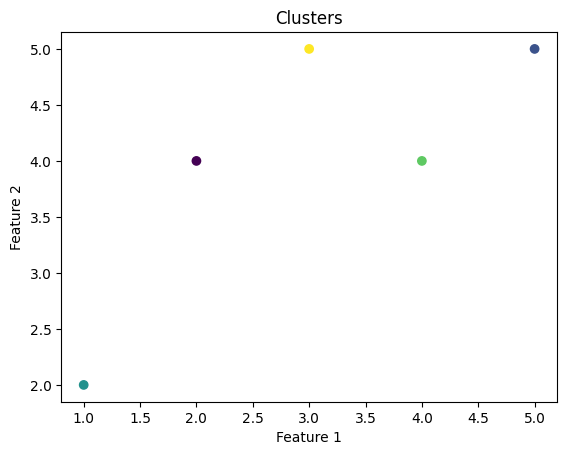

In [86]:
import matplotlib.pyplot as plt

plt.scatter(df['feature1'], df['feature2'], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters')
plt.show()

In [1]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
cluster_labels = dbscan.fit_predict(scaled_features)

NameError: name 'DBSCAN' is not defined

In [94]:
df['cluster'] = cluster_labels
df.to_csv('clustered_data.csv', index=False)
print(df)

   feature1  feature2  cluster
0         1         2       -1
1         2         4        0
2         3         5        0
3         4         4        0
4         5         5        0
